## 데이터 불러오기

In [1]:
import os
import pandas as pd
import imghdr
data_path = "./data/FaceShapeDataset/training_set/"

In [2]:
img_paths = []
labels = []

for x in os.listdir(data_path):
    label_path = os.path.join(data_path, x)

    if os.path.isdir(label_path): 
        for file in os.listdir(label_path):
            file_path = os.path.join(label_path, file)

            # 파일이 실제 이미지인지 확인
            real_format = imghdr.what(file_path)
            if real_format in ["jpeg", "png", "jpg"]:  # 지원하는 이미지 확장자만 추가
                img_paths.append(file_path)
                labels.append(x)

In [3]:
# df 생성
df =  pd.DataFrame({"image_path": img_paths, "label": labels})

In [3]:
# test 데이터도도 동일하게 진행 
test_path = "./data/FaceShapeDataset/testing_set/"
test_paths = []
test_labels = []

for x in os.listdir(test_path):
    label_path = os.path.join(test_path, x)

    if os.path.isdir(label_path): 
        for file in os.listdir(label_path):
            file_path = os.path.join(label_path, file)

            # 파일이 실제 이미지인지 확인
            real_format = imghdr.what(file_path)
            if real_format in ["jpeg", "png", "jpg"]:
                test_paths.append(label_path +'/'+ file)
                test_labels.append(x)  

df_test =  pd.DataFrame({"image_path": test_paths, "label": test_labels})

In [5]:
df, df_test

(                                             image_path   label
 0     ./data/FaceShapeDataset/training_set/Heart\hea...   Heart
 1     ./data/FaceShapeDataset/training_set/Heart\hea...   Heart
 2     ./data/FaceShapeDataset/training_set/Heart\hea...   Heart
 3     ./data/FaceShapeDataset/training_set/Heart\hea...   Heart
 4     ./data/FaceShapeDataset/training_set/Heart\hea...   Heart
 ...                                                 ...     ...
 3969  ./data/FaceShapeDataset/training_set/Square\sq...  Square
 3970  ./data/FaceShapeDataset/training_set/Square\sq...  Square
 3971  ./data/FaceShapeDataset/training_set/Square\sq...  Square
 3972  ./data/FaceShapeDataset/training_set/Square\sq...  Square
 3973  ./data/FaceShapeDataset/training_set/Square\sq...  Square
 
 [3974 rows x 2 columns],
                                             image_path   label
 0    ./data/FaceShapeDataset/testing_set/Heart/hear...   Heart
 1    ./data/FaceShapeDataset/testing_set/Heart/hear...   Heart


In [4]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# 라이브러리 소환
mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5)



In [115]:

# 이미지 로드
image = cv2.imread(df['image_path'][0])
h, w, _ = image.shape
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 얼굴 검출
results = face_detection.process(image_rgb)
num = 0
# 얼굴 크롭
if results.detections:
    for detection in results.detections:
        bbox = detection.location_data.relative_bounding_box
        x, y, w_box, h_box = int(bbox.xmin * w), int(bbox.ymin * h), int(bbox.width * w), int(bbox.height * h)
        face_crop = image[y:y+h_box, x:x+w_box]
        cv2.imwrite(f"./data/data/{num}.jpg", face_crop)
        num +=1


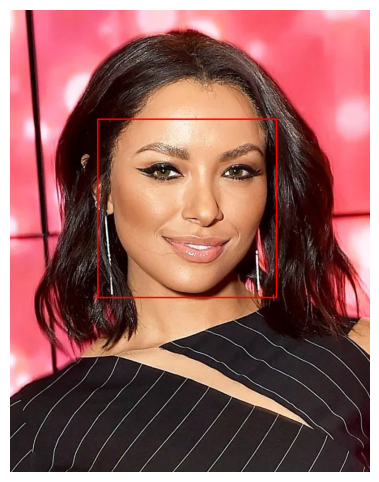

In [116]:
# 한개의 이미지 검출 체크크
# 이미지 로드
image = cv2.imread(df['image_path'][1])  # BGR 형식으로 로드됨
h, w, _ = image.shape
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR이므로 RGB로 변환 필수

# 얼굴 검출
results = face_detection.process(image_rgb)

# 얼굴 검출된 이미지에 박스 그리기
if results.detections:
    for detection in results.detections:
        bbox = detection.location_data.relative_bounding_box
        x, y, w_box, h_box = int(bbox.xmin * w), int(bbox.ymin * h), int(bbox.width * w), int(bbox.height * h)

        # 얼굴 영역 박스 그리기 (RGB 색상: 빨간색)
        cv2.rectangle(image_rgb, (x, y), (x + w_box, y + h_box), (255, 0, 0), 2)

# Jupyter Notebook에서 결과 출력 (Matplotlib 사용)
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)  # OpenCV 이미지는 BGR이므로 RGB 변환 필요
plt.axis("off")  # 축 제거
plt.show()


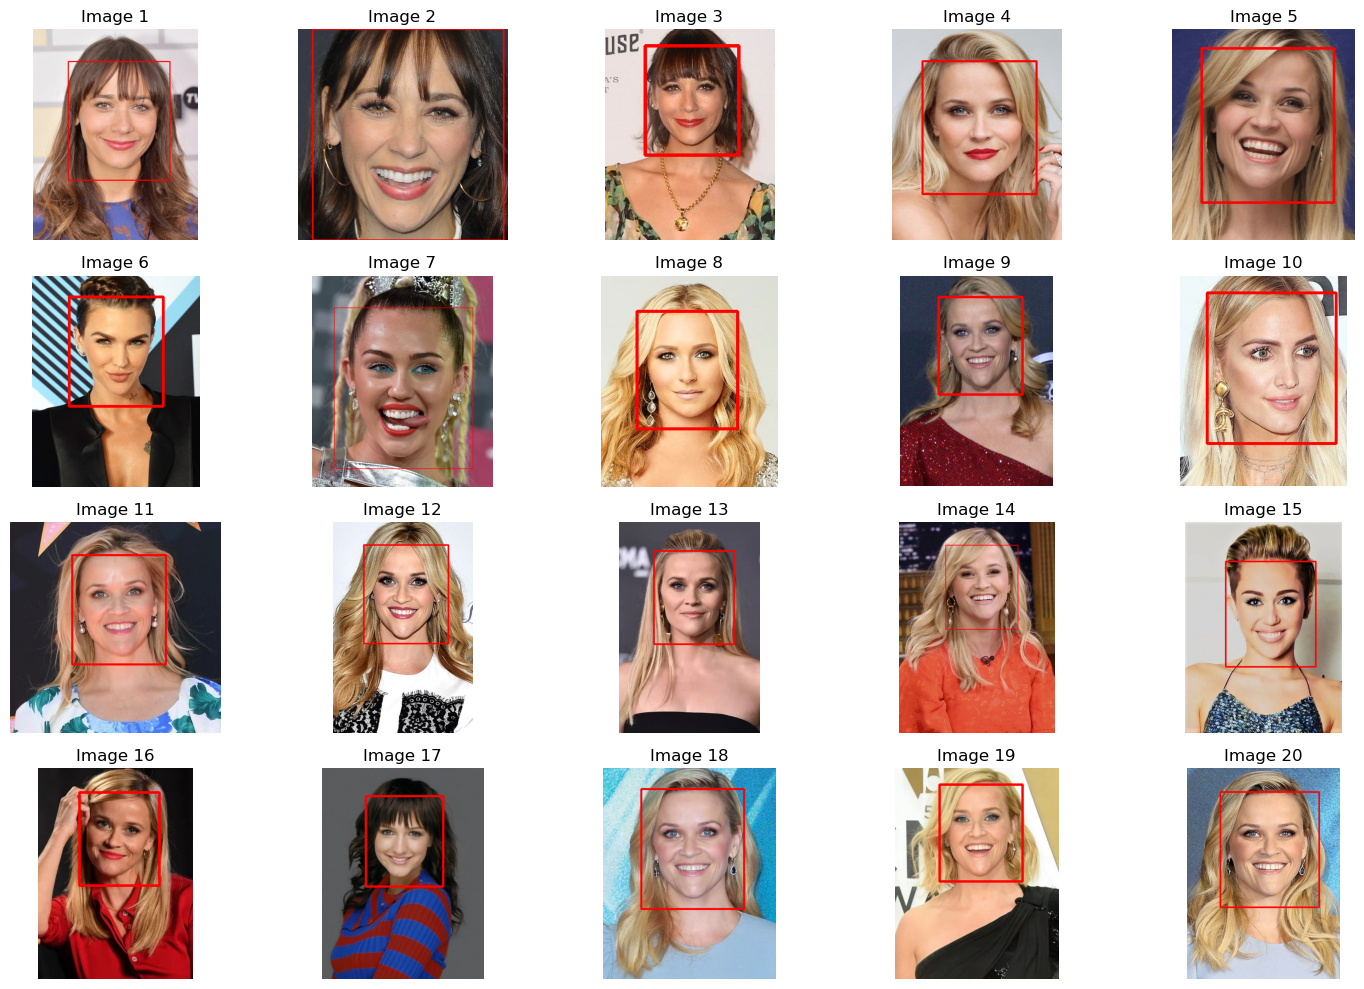

In [45]:
# 표시할 이미지 개수 설정
num_images = 20
selected_images = df['image_path'][30:50]

# 서브플롯 크기 설정
rows, cols = 4, 5
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

for idx, image_path in enumerate(selected_images):
    if idx >= rows * cols:
        break

    # 이미지 로드 및 RGB 변환
    image = cv2.imread(image_path)
    h, w, _ = image.shape
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 얼굴 검출
    results = face_detection.process(image_rgb)

    # 얼굴 검출된 이미지에 박스 그리기
    if results.detections:
        for detection in results.detections:
            bbox = detection.location_data.relative_bounding_box
            x, y, w_box, h_box = int(bbox.xmin * w), int(bbox.ymin * h), int(bbox.width * w), int(bbox.height * h)

            # 박스 크기 조정
            x_margin = int(w_box * 0.1)  
            y_margin_top = int(h_box * 0.25)  # 이마
            y_margin_bottom = int(h_box * 0.15)  # 턱

            x1 = max(0, x - x_margin) 
            y1 = max(0, y - y_margin_top) 
            x2 = min(w, x + w_box + x_margin)  
            y2 = min(h, y + h_box + y_margin_bottom) 

            # 얼굴 영역 박스 그리기
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (255, 0, 0), 3)
            # cv2.rectangle(image_rgb, (x, y), (x + w_box, y + h_box), (255, 0, 0), 2)

            # 크롭된 얼굴 저장
            # face_crop = image_rgb[y1:y2, x1:x2]
            # cv2.imwrite(f"./data/cropped_{idx}.jpg", cv2.cvtColor(face_crop, cv2.COLOR_RGB2BGR))

    # 현재 서브플롯 위치에 이미지 출력
    ax = axes[idx // cols, idx % cols]
    ax.imshow(image_rgb)
    ax.axis("off")
    ax.set_title(f"Image {idx+1}")

plt.tight_layout()
plt.show()

## 전처리함수 작성

In [7]:
## 데이터증강 
# 회전전
def rotation(img):
    # 각도
    angles = [-10, -5, 0, 5, 10]
    #회전 
    h, w = img.shape[:2]
    rotated_images = []

    for angle in angles :
        M = cv2.getRotationMatrix2D((w // 2, h // 2), angle, 1)
        rotated_img = cv2.warpAffine(img, M, (w, h))
        rotated_images.append(rotated_img)

    return rotated_images

# 반전 + 회전
def reversal(img):
    # 반전 적용 
    img = cv2.flip(img, 1)
    return rotation(img)


In [5]:
## 검출 및 박스생성, 저장 
# 얼굴 검출
def defction(image_rgb):
    # 얼굴 검출
    results = face_detection.process(image_rgb)
    return results

# 검출 이미지에 박스 그리기 
def boxdraw(results, image_rgb, h, w):
    for detection in results.detections:
        bbox = detection.location_data.relative_bounding_box
        x, y, w_box, h_box = int(bbox.xmin * w), int(bbox.ymin * h), int(bbox.width * w), int(bbox.height * h)

        # 박스 크기 조정
        x_margin = int(w_box * 0.1)  
        y_margin_top = int(h_box * 0.25)  # 이마
        y_margin_bottom = int(h_box * 0.15)  # 턱

        x1 = max(0, x - x_margin) 
        y1 = max(0, y - y_margin_top) 
        x2 = min(w, x + w_box + x_margin)  
        y2 = min(h, y + h_box + y_margin_bottom) 

        # 얼굴 영역 박스 그리기
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (255, 0, 0), 3)

    return image_rgb  

# 검출 이미지 크롭 
def crop(detection, img, file_path, h, w):
    bbox = detection.location_data.relative_bounding_box
    x, y, w_box, h_box = int(bbox.xmin * w), int(bbox.ymin * h), int(bbox.width * w), int(bbox.height * h)

    # 박스 크기 조정
    x_margin = int(w_box * 0.1)  
    y_margin_top = int(h_box * 0.25)  # 이마
    y_margin_bottom = int(h_box * 0.15)  # 턱
    # 확장된 좌표 계산
    x1 = max(0, x - x_margin)  
    y1 = max(0, y - y_margin_top)  
    x2 = min(w, x + w_box + x_margin)  
    y2 = min(h, y + h_box + y_margin_bottom)  

    # 크롭
    face_crop = img[y1:y2, x1:x2]
    cv2.imwrite(file_path, face_crop)
    

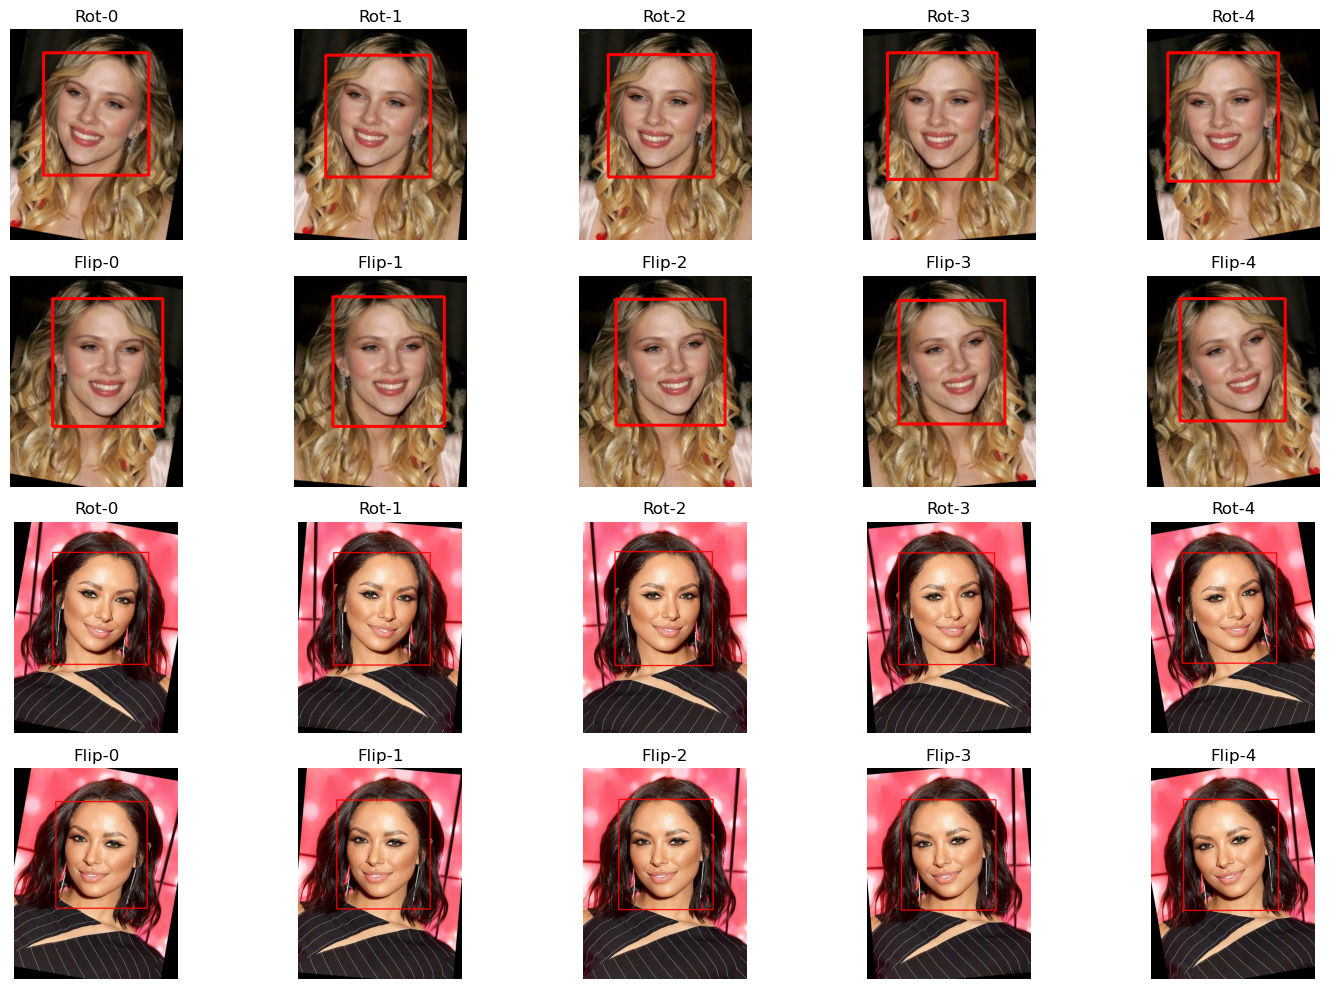

In [ ]:
# 증강 미리보기
# 표시할 이미지 개수 설정
selected_images = df['image_path'][0:5]

# 서브플롯 크기 설정
rows, cols = 4, 5
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

plot_idx = 0
for idx, image_path in enumerate(selected_images):
    if plot_idx >= rows * cols:
        break

    # 원본 이미지 로드 및 변환
    image = cv2.imread(image_path)
    h, w = image.shape[:2]
    
    # 회전된 이미지 저장
    rotated_images = rotation(image)
    flipped_images = reversal(image)

    # 회전된 이미지 추가
    for rotated_idx, img in enumerate(rotated_images):
        if plot_idx >= rows * cols:  
            break  # subplot 개수를 초과하면 중단

        h, w = img.shape[:2]
        image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = defction(image_rgb)
        img_with_box = boxdraw(results, image_rgb, h, w)

        ax = axes[plot_idx // cols, plot_idx % cols]  # 업데이트된 subplot 위치
        ax.imshow(img_with_box)
        ax.axis("off")
        ax.set_title(f"Rot-{rotated_idx}")
        plot_idx += 1  # subplot 위치 업데이트

    # 반전+회전된 이미지 추가
    for flipped_idx, img in enumerate(flipped_images):
        if plot_idx >= rows * cols:  
            break  # subplot 개수를 초과하면 중단

        h, w = img.shape[:2]
        image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = defction(image_rgb)
        img_with_box = boxdraw(results, image_rgb, h, w)

        ax = axes[plot_idx // cols, plot_idx % cols]  # 업데이트된 subplot 위치
        ax.imshow(img_with_box)
        ax.axis("off")
        ax.set_title(f"Flip-{flipped_idx}")
        plot_idx += 1  # subplot 위치 업데이트

plt.tight_layout()
plt.show()

## 전처리 진행

In [16]:
from tqdm import tqdm 
# 변환된 이미지 크롭 및 저장 
selected_images = df['image_path']
img_labels = df['label']


augmented_data = []

for idx, image_path in tqdm(enumerate(selected_images)):
    label = img_labels[idx]
    
    # 원본 이미지 로드 및 변환
    image = cv2.imread(image_path)
    
    # 변환 (회전 + 반전)
    transformed_images = rotation(image) + reversal(image)

    # 얼굴 검출 (모든 변환된 이미지에서)
    for img_idx, img in enumerate(transformed_images):
        h, w = img.shape[:2]
        image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = defction(image_rgb)

        # 얼굴 검출 후 크롭 및 저장
        if results.detections:
            for det_idx, detection in enumerate(results.detections): 
                
                confidence = detection.score[0]  # 신뢰도 점수 (0~1)
                
                if confidence < 0.75:
                    print(f"❌ {idx}_{img_idx}_{det_idx} 신뢰도 낮음: {confidence:.2f} → 스킵")
                    continue  # 신뢰도 낮으면 제외

                # 얼굴 크롭 후 저장
                file_path = f"./dataset/{idx}_{img_idx}_{det_idx}.jpg"
                crop(detection, img, file_path, h, w)  
                augmented_data.append({"image_path": file_path, "label": label})  


# 증강된 데이터 DataFrame 생성
df_augmented = pd.DataFrame(augmented_data)


60it [00:03, 13.89it/s]

❌ 59_1_1 신뢰도 낮음: 0.59 → 스킵
❌ 59_3_1 신뢰도 낮음: 0.62 → 스킵
❌ 59_4_1 신뢰도 낮음: 0.71 → 스킵


123it [00:07, 19.58it/s]

❌ 119_7_1 신뢰도 낮음: 0.51 → 스킵
❌ 119_8_1 신뢰도 낮음: 0.53 → 스킵


149it [00:09, 15.55it/s]

❌ 147_4_1 신뢰도 낮음: 0.53 → 스킵


194it [00:11, 15.00it/s]

❌ 192_1_1 신뢰도 낮음: 0.50 → 스킵
❌ 192_2_1 신뢰도 낮음: 0.53 → 스킵
❌ 192_7_1 신뢰도 낮음: 0.52 → 스킵


331it [00:21, 17.52it/s]

❌ 327_0_1 신뢰도 낮음: 0.70 → 스킵
❌ 327_1_1 신뢰도 낮음: 0.66 → 스킵
❌ 327_1_2 신뢰도 낮음: 0.53 → 스킵
❌ 327_2_1 신뢰도 낮음: 0.72 → 스킵
❌ 327_2_2 신뢰도 낮음: 0.50 → 스킵
❌ 327_3_1 신뢰도 낮음: 0.68 → 스킵
❌ 327_3_2 신뢰도 낮음: 0.52 → 스킵
❌ 327_4_1 신뢰도 낮음: 0.59 → 스킵
❌ 327_5_1 신뢰도 낮음: 0.56 → 스킵


388it [00:25, 16.52it/s]

❌ 387_2_1 신뢰도 낮음: 0.60 → 스킵
❌ 387_7_1 신뢰도 낮음: 0.60 → 스킵


402it [00:26, 14.75it/s]

❌ 399_4_1 신뢰도 낮음: 0.53 → 스킵


482it [00:30, 15.72it/s]

❌ 479_8_1 신뢰도 낮음: 0.55 → 스킵
❌ 479_9_1 신뢰도 낮음: 0.56 → 스킵
❌ 479_9_2 신뢰도 낮음: 0.55 → 스킵


506it [00:33,  8.11it/s]

❌ 504_0_1 신뢰도 낮음: 0.54 → 스킵
❌ 504_2_1 신뢰도 낮음: 0.53 → 스킵
❌ 504_4_1 신뢰도 낮음: 0.60 → 스킵
❌ 504_5_1 신뢰도 낮음: 0.71 → 스킵
❌ 504_8_1 신뢰도 낮음: 0.54 → 스킵
❌ 504_9_1 신뢰도 낮음: 0.56 → 스킵


544it [00:35, 17.01it/s]

❌ 540_2_1 신뢰도 낮음: 0.74 → 스킵
❌ 540_2_2 신뢰도 낮음: 0.58 → 스킵
❌ 540_3_2 신뢰도 낮음: 0.61 → 스킵
❌ 540_5_1 신뢰도 낮음: 0.64 → 스킵
❌ 540_7_1 신뢰도 낮음: 0.72 → 스킵
❌ 540_8_1 신뢰도 낮음: 0.70 → 스킵
❌ 540_9_1 신뢰도 낮음: 0.74 → 스킵


556it [00:35, 19.21it/s]

❌ 552_7_1 신뢰도 낮음: 0.58 → 스킵


661it [00:42, 22.89it/s]

❌ 660_1_1 신뢰도 낮음: 0.52 → 스킵
❌ 660_4_1 신뢰도 낮음: 0.54 → 스킵
❌ 660_6_1 신뢰도 낮음: 0.58 → 스킵


682it [00:43, 22.79it/s]

❌ 677_2_1 신뢰도 낮음: 0.55 → 스킵


798it [00:49, 16.09it/s]

❌ 797_0_1 신뢰도 낮음: 0.64 → 스킵
❌ 797_1_1 신뢰도 낮음: 0.51 → 스킵
❌ 797_7_1 신뢰도 낮음: 0.58 → 스킵
❌ 797_8_1 신뢰도 낮음: 0.59 → 스킵
❌ 797_9_1 신뢰도 낮음: 0.69 → 스킵


823it [00:51, 16.81it/s]

❌ 820_2_1 신뢰도 낮음: 0.52 → 스킵


1193it [01:12, 25.02it/s]

❌ 1190_3_1 신뢰도 낮음: 0.51 → 스킵
❌ 1190_4_1 신뢰도 낮음: 0.65 → 스킵


1289it [01:17, 21.70it/s]

❌ 1284_0_1 신뢰도 낮음: 0.61 → 스킵
❌ 1284_1_1 신뢰도 낮음: 0.67 → 스킵
❌ 1284_3_1 신뢰도 낮음: 0.72 → 스킵
❌ 1284_4_1 신뢰도 낮음: 0.71 → 스킵
❌ 1284_5_1 신뢰도 낮음: 0.71 → 스킵
❌ 1284_6_1 신뢰도 낮음: 0.53 → 스킵
❌ 1284_7_1 신뢰도 낮음: 0.59 → 스킵
❌ 1284_8_1 신뢰도 낮음: 0.70 → 스킵


1500it [01:33, 14.45it/s]

❌ 1497_2_1 신뢰도 낮음: 0.58 → 스킵
❌ 1497_3_1 신뢰도 낮음: 0.54 → 스킵


1691it [01:47, 14.21it/s]

❌ 1688_1_1 신뢰도 낮음: 0.51 → 스킵


1706it [01:48, 20.92it/s]

❌ 1704_4_0 신뢰도 낮음: 0.74 → 스킵
❌ 1704_5_0 신뢰도 낮음: 0.74 → 스킵


1714it [01:49, 12.95it/s]

❌ 1713_0_1 신뢰도 낮음: 0.57 → 스킵
❌ 1713_1_1 신뢰도 낮음: 0.57 → 스킵
❌ 1713_3_1 신뢰도 낮음: 0.62 → 스킵
❌ 1713_6_1 신뢰도 낮음: 0.55 → 스킵
❌ 1713_7_1 신뢰도 낮음: 0.54 → 스킵
❌ 1713_8_1 신뢰도 낮음: 0.50 → 스킵


1938it [02:03, 22.89it/s]

❌ 1935_2_1 신뢰도 낮음: 0.53 → 스킵
❌ 1935_7_1 신뢰도 낮음: 0.60 → 스킵
❌ 1935_8_1 신뢰도 낮음: 0.61 → 스킵


1954it [02:04, 16.61it/s]

❌ 1952_0_1 신뢰도 낮음: 0.53 → 스킵


2263it [02:21, 14.53it/s]

❌ 2261_0_1 신뢰도 낮음: 0.51 → 스킵


2323it [02:26, 13.10it/s]

❌ 2320_3_1 신뢰도 낮음: 0.51 → 스킵
❌ 2320_4_1 신뢰도 낮음: 0.53 → 스킵
❌ 2320_5_1 신뢰도 낮음: 0.52 → 스킵
❌ 2320_6_1 신뢰도 낮음: 0.54 → 스킵
❌ 2320_7_1 신뢰도 낮음: 0.66 → 스킵
❌ 2320_8_1 신뢰도 낮음: 0.59 → 스킵
❌ 2320_9_1 신뢰도 낮음: 0.69 → 스킵


2402it [02:31, 14.55it/s]

❌ 2399_7_1 신뢰도 낮음: 0.52 → 스킵


2446it [02:33, 19.16it/s]

❌ 2442_1_1 신뢰도 낮음: 0.51 → 스킵
❌ 2442_2_1 신뢰도 낮음: 0.60 → 스킵
❌ 2442_7_1 신뢰도 낮음: 0.65 → 스킵
❌ 2442_8_1 신뢰도 낮음: 0.59 → 스킵
❌ 2442_9_1 신뢰도 낮음: 0.63 → 스킵


2455it [02:33, 17.98it/s]

❌ 2454_2_1 신뢰도 낮음: 0.58 → 스킵
❌ 2454_3_1 신뢰도 낮음: 0.53 → 스킵
❌ 2454_6_1 신뢰도 낮음: 0.57 → 스킵
❌ 2454_7_1 신뢰도 낮음: 0.52 → 스킵


2538it [02:39, 14.21it/s]

❌ 2535_6_1 신뢰도 낮음: 0.57 → 스킵


2605it [02:44, 10.67it/s]

❌ 2603_2_1 신뢰도 낮음: 0.59 → 스킵


2766it [02:53, 23.55it/s]

❌ 2761_2_1 신뢰도 낮음: 0.51 → 스킵


2856it [02:58, 19.38it/s]

❌ 2853_2_1 신뢰도 낮음: 0.52 → 스킵


2994it [03:07, 20.26it/s]

❌ 2992_6_1 신뢰도 낮음: 0.60 → 스킵


3065it [03:13, 19.20it/s]

❌ 3063_6_1 신뢰도 낮음: 0.54 → 스킵


3157it [03:22,  7.11it/s]

❌ 3156_7_1 신뢰도 낮음: 0.55 → 스킵


3626it [03:51, 19.77it/s]

❌ 3624_8_1 신뢰도 낮음: 0.55 → 스킵


3661it [03:52, 21.82it/s]

❌ 3657_2_1 신뢰도 낮음: 0.70 → 스킵
❌ 3657_7_1 신뢰도 낮음: 0.51 → 스킵
❌ 3659_0_1 신뢰도 낮음: 0.53 → 스킵
❌ 3659_5_1 신뢰도 낮음: 0.52 → 스킵
❌ 3659_7_1 신뢰도 낮음: 0.53 → 스킵


3673it [03:53, 23.40it/s]

❌ 3671_0_1 신뢰도 낮음: 0.54 → 스킵
❌ 3671_1_1 신뢰도 낮음: 0.60 → 스킵
❌ 3671_2_1 신뢰도 낮음: 0.55 → 스킵
❌ 3671_3_1 신뢰도 낮음: 0.60 → 스킵
❌ 3671_4_1 신뢰도 낮음: 0.53 → 스킵
❌ 3671_5_1 신뢰도 낮음: 0.70 → 스킵
❌ 3671_6_1 신뢰도 낮음: 0.61 → 스킵
❌ 3671_7_1 신뢰도 낮음: 0.72 → 스킵
❌ 3671_9_1 신뢰도 낮음: 0.71 → 스킵


3702it [03:55, 11.14it/s]

❌ 3701_0_1 신뢰도 낮음: 0.55 → 스킵
❌ 3701_2_1 신뢰도 낮음: 0.53 → 스킵
❌ 3701_3_1 신뢰도 낮음: 0.61 → 스킵
❌ 3701_4_1 신뢰도 낮음: 0.59 → 스킵


3724it [03:57, 13.57it/s]

❌ 3721_4_1 신뢰도 낮음: 0.51 → 스킵


3755it [04:00,  7.83it/s]

❌ 3752_4_1 신뢰도 낮음: 0.51 → 스킵


3762it [04:00, 12.68it/s]

❌ 3759_6_1 신뢰도 낮음: 0.51 → 스킵
❌ 3759_7_1 신뢰도 낮음: 0.65 → 스킵


3776it [04:01, 20.60it/s]

❌ 3771_2_1 신뢰도 낮음: 0.54 → 스킵
❌ 3771_3_1 신뢰도 낮음: 0.56 → 스킵
❌ 3771_7_1 신뢰도 낮음: 0.64 → 스킵


3786it [04:02, 14.61it/s]

❌ 3783_3_1 신뢰도 낮음: 0.67 → 스킵
❌ 3783_5_1 신뢰도 낮음: 0.55 → 스킵
❌ 3783_7_1 신뢰도 낮음: 0.64 → 스킵
❌ 3783_8_1 신뢰도 낮음: 0.64 → 스킵


3829it [04:04, 16.61it/s]

❌ 3826_0_1 신뢰도 낮음: 0.54 → 스킵


3974it [04:14, 15.59it/s]


### 검토 및 DF수정

In [59]:
# 수기 검사하여 이미지 추가 및삭제 

append_file = [
	['1704_4_0','Oval'],
	['1704_5_0','Oval']
]
delete_files = [
	'504_3_1',
	'540_0_1',
	'540_1_1',
	'540_3_1',
	'540_4_1',
	'540_6_1',
	'1284_2_1',
	'3671_8_1',
	'3783_1_1',
	'3783_2_1',
	'3783_4_1'
]

In [81]:
# # df_augmented.to_csv("./data/df.csv", index=False)
# # CSV 파일 불러오기
# df_augmented = pd.read_csv("./data/originalDF.csv", encoding="utf-8-sig")

# # DataFrame 확인
df_augmented


,image_path,label
0,./dataset/0_0_0.jpg,Heart
1,./dataset/0_1_0.jpg,Heart
2,./dataset/0_2_0.jpg,Heart
3,./dataset/0_3_0.jpg,Heart
4,./dataset/0_4_0.jpg,Heart
...,...,...
39735,./dataset/3973_7_0.jpg,Square
39736,./dataset/3973_8_0.jpg,Square
39737,./dataset/3973_9_0.jpg,Square
39738,./dataset/1704_4_0.jpg,Oval


In [78]:
# df 리스트 내 삭제 
base_path = "./dataset/"
delete_file_paths = [os.path.join(base_path, f"{file}.jpg") for file in delete_files]
df_augmented = df_augmented[~df_augmented['image_path'].isin(delete_file_paths)]

In [80]:
# df 리스트 내 추가 
df_append = pd.DataFrame(append_file, columns=['image_path', 'label'])
df_append['image_path'] = base_path + df_append['image_path'] + '.jpg'
# 기존 df 에 붙이기기
df_augmented = pd.concat([df_augmented, df_append], ignore_index=True)

In [84]:
# df_augmented.to_csv("./data/finishDF.csv", index=False)

In [9]:
### -> 데이터로더 작성시 사이즈 통일..
# # 이미지 224*224 통일 
# import cv2
# import os
# from tqdm import tqdm

# # 변환할 크기
# target_size = (224, 224)

# # 이미지 경로 리스트
# image_paths = df_augmented['image_path'].tolist()

# for image_path in tqdm(image_paths, desc="Resizing images"):
#     # 이미지 읽기
#     img = cv2.imread(image_path)

#     if img is None:
#         print(f"⚠️ 이미지 로드 실패: {image_path}")
#         continue

#     # 이미지 리사이징
#     resized_img = cv2.resize(img, target_size)

#     # 새로 저장
#     img_name = image_path.split('/')[-1]
#     cv2.imwrite(f'./dataset_resize/{img_name}', resized_img)


In [ ]:
# test 데이터도.. 

from tqdm import tqdm 
# 변환된 이미지 크롭 및 저장 
test_images = df_test['image_path']
test_img_labels = df_test['label']


test_datas = []

for idx, image_path in tqdm(enumerate(test_images)):
    label = test_img_labels[idx]
    
    # 원본 이미지 로드 및 변환
    image = cv2.imread(image_path)
    

    # 얼굴 검출 (모든 변환된 이미지에서)
    h, w = image.shape[:2]
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = defction(image_rgb)

    # 얼굴 검출 후 크롭 및 저장
    if results.detections:
        for det_idx, detection in enumerate(results.detections): 
            
            confidence = detection.score[0]  # 신뢰도 점수 (0~1)
            
            if confidence < 0.75:
                print(f"❌ {idx}_{det_idx} 신뢰도 낮음: {confidence:.2f} → 스킵")
                continue  # 신뢰도 낮으면 제외

            # 얼굴 크롭 후 저장
            file_path = f"./test_dataset/{idx}_{det_idx}.jpg"
            crop(detection, image, file_path, h, w)  
            test_datas.append({"image_path": file_path, "label": label})  


# 데이터 DataFrame 생성
df_test_new = pd.DataFrame(test_datas)


125it [00:01, 119.05it/s]

❌ 107_1 신뢰도 낮음: 0.62 → 스킵
❌ 119_1 신뢰도 낮음: 0.59 → 스킵


303it [00:02, 128.72it/s]

❌ 289_1 신뢰도 낮음: 0.51 → 스킵


995it [00:08, 113.80it/s]


In [7]:
# CSV로 저장
df_test_new.to_csv("./data/test_dataset.csv", index=False)